# Temperature_Prediction Dataset

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Temp_dataset.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All are float datatype except date.

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

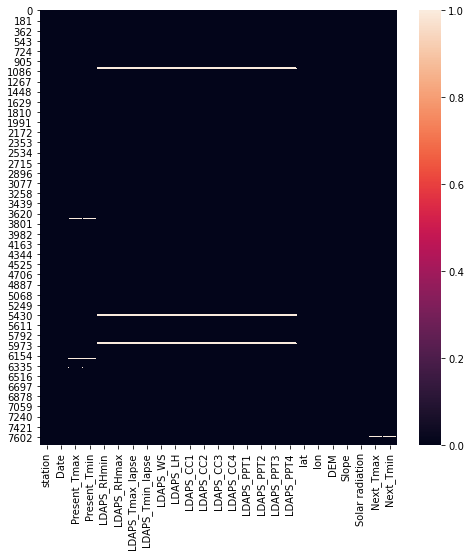

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

There are many null values in the dataset . let's treat them .

In [8]:
df.station.fillna(df.station.median(), inplace = True)
df.Present_Tmax.fillna(df.Present_Tmax.median(), inplace = True)
df.Present_Tmin.fillna(df.Present_Tmin.median(), inplace = True)
df.LDAPS_RHmin.fillna(df.LDAPS_RHmin.median(), inplace = True)
df.LDAPS_RHmax.fillna(df.LDAPS_RHmax.median(), inplace = True)
df.LDAPS_Tmax_lapse.fillna(df.LDAPS_Tmax_lapse.median(), inplace = True)
df.LDAPS_Tmin_lapse.fillna(df.LDAPS_Tmin_lapse.median(), inplace = True)
df.LDAPS_WS.fillna(df.LDAPS_WS.median(), inplace = True)
df.LDAPS_LH.fillna(df.LDAPS_LH.median(), inplace = True)
df.LDAPS_CC1.fillna(df.LDAPS_CC1.median(), inplace = True)
df.LDAPS_CC2.fillna(df.LDAPS_CC2.median(), inplace = True)
df.LDAPS_CC3.fillna(df.LDAPS_CC3.median(), inplace = True)
df.LDAPS_CC4.fillna(df.LDAPS_CC4.median(), inplace = True)
df.LDAPS_PPT1.fillna(df.LDAPS_PPT1.median(), inplace = True)
df.LDAPS_PPT2.fillna(df.LDAPS_PPT2.median(), inplace = True)
df.LDAPS_PPT3.fillna(df.LDAPS_PPT3.median(), inplace = True)
df.LDAPS_PPT4.fillna(df.LDAPS_PPT4.median(), inplace = True)
df.lat.fillna(df.lat.median(), inplace = True)
df.lon.fillna(df.lon.median(), inplace = True)
df.DEM.fillna(df.DEM.median(), inplace = True)
df.Slope.fillna(df.Slope.median(), inplace = True)
df['Solar radiation'].fillna(df['Solar radiation'].median(), inplace = True)
df.Next_Tmax.fillna(df.Next_Tmax.median(), inplace = True)
df.Next_Tmin.fillna(df.Next_Tmin.median(), inplace = True)

In [9]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
#we can drop the date column 
df.drop(['Date'], axis=1, inplace= True)

In [11]:
df.shape

(7752, 24)

# Data Analysis/ EDA

In [12]:
#Statistical Summary

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.769401,23.226638,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275671,22.932804
std,7.210637,2.956583,2.403093,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122585,2.483296
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In some columns there is outliers and skewness present .

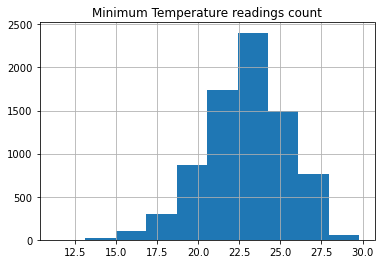

In [13]:
df["Next_Tmin"].hist(grid=True)
plt.title("Minimum Temperature readings count")
plt.show()

higher counts of temperatures are in the range of 22.5 to 25 c

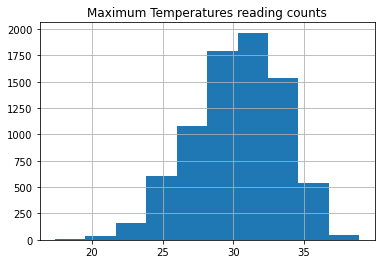

In [14]:
df["Next_Tmax"].hist(grid=True)
plt.title("Maximum Temperatures reading counts")
plt.show()

Next_max temperatures count seem to have high counts (almost over 1800 counts in between)in the range of 28 to 33 c.

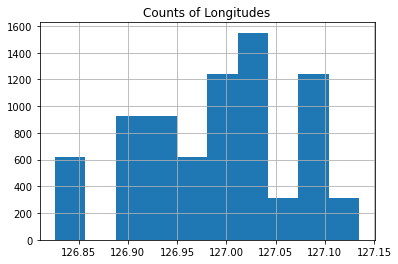

In [15]:
df["lon"].hist(grid=True)
plt.title("Counts of Longitudes")
plt.show()

For Longitude (between points 127.00 to 127.05) has the higest count which is near to 1500 and all other readings of longitudes are less than this.Mininum count is up to 300 for 127.15 lonitudes.

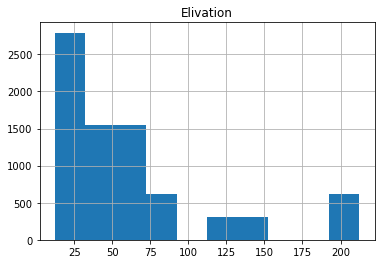

In [16]:
df["DEM"].hist(grid=True)
plt.title("Elivation")
plt.show()

The Elivation ranges are in between 12.4 to 212.3

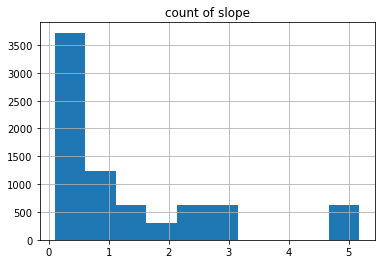

In [17]:
df["Slope"].hist(grid=True)
plt.title("count of slope")
plt.show()

Ranges of slope is between 0.1 to 5.2 A. Higher counts seems to be in minimun ranges of 0.1 to 0.5 A.

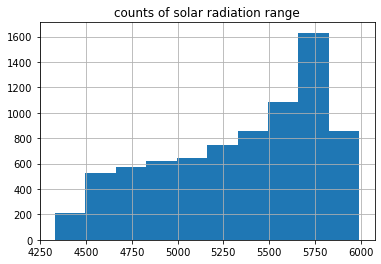

In [18]:
df["Solar radiation"].hist(grid=True)
plt.title("counts of solar radiation range")
plt.show()

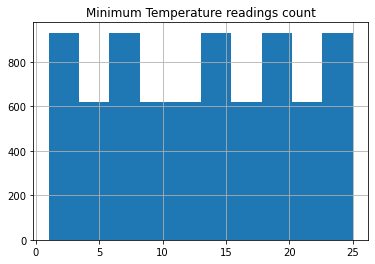

In [19]:
df["station"].hist(grid=True)
plt.title("Minimum Temperature readings count")
plt.show()

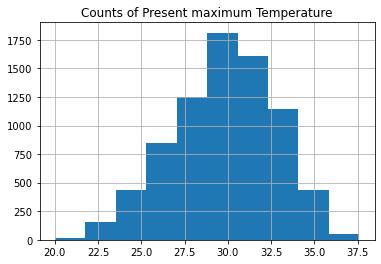

In [21]:
df["Present_Tmax"].hist(grid=True)
plt.title("Counts of Present maximum Temperature")
plt.show()

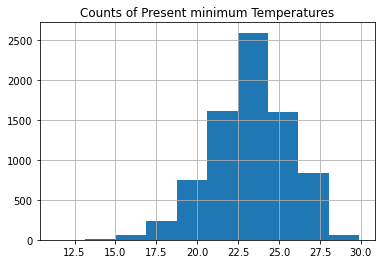

In [22]:

df["Present_Tmin"].hist(grid=True)
plt.title("Counts of Present minimum Temperatures")
plt.show()

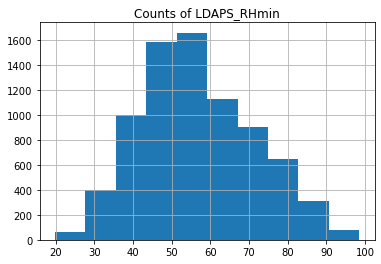

In [23]:
df["LDAPS_RHmin"].hist(grid=True)
plt.title("Counts of LDAPS_RHmin")
plt.show()

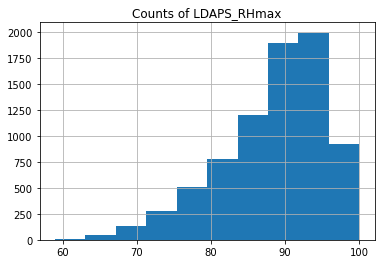

In [24]:
df["LDAPS_RHmax"].hist(grid=True)
plt.title("Counts of LDAPS_RHmax")
plt.show()

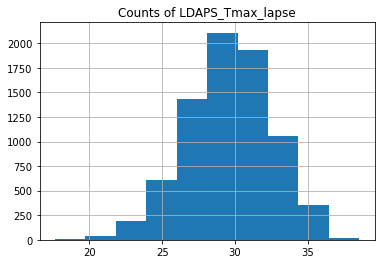

In [25]:
df["LDAPS_Tmax_lapse"].hist(grid=True)
plt.title("Counts of LDAPS_Tmax_lapse")
plt.show()

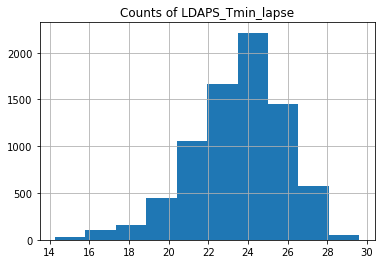

In [26]:
df["LDAPS_Tmin_lapse"].hist(grid=True)
plt.title("Counts of LDAPS_Tmin_lapse")
plt.show()

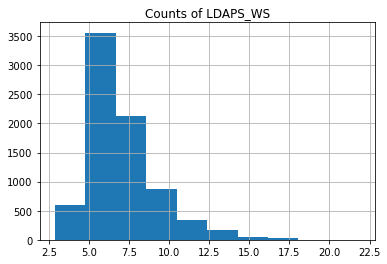

In [27]:
df["LDAPS_WS"].hist(grid=True)
plt.title("Counts of LDAPS_WS")
plt.show()

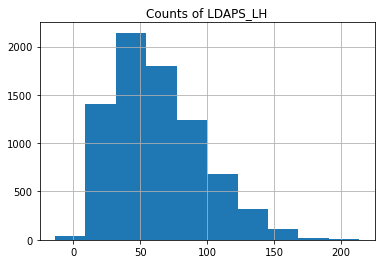

In [28]:
df["LDAPS_LH"].hist(grid=True)
plt.title("Counts of LDAPS_LH")
plt.show()

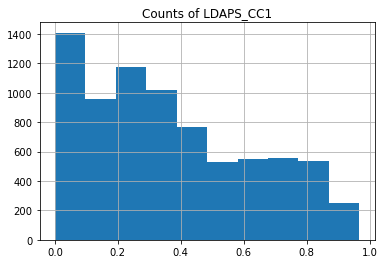

In [29]:
df["LDAPS_CC1"].hist(grid=True)
plt.title("Counts of LDAPS_CC1")
plt.show()

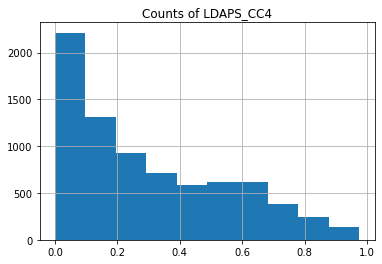

In [30]:
df["LDAPS_CC4"].hist(grid=True)
plt.title("Counts of LDAPS_CC4")
plt.show()

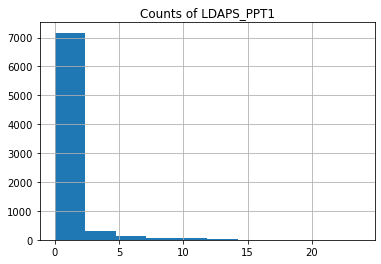

In [31]:
df["LDAPS_PPT1"].hist(grid=True)
plt.title("Counts of LDAPS_PPT1")
plt.show()

 LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7. Maximum number of precipitaion recored in the range of 0 to 2.5

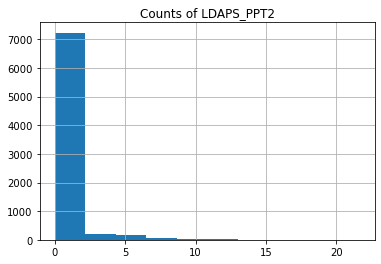

In [32]:
df["LDAPS_PPT2"].hist(grid=True)
plt.title("Counts of LDAPS_PPT2")
plt.show()

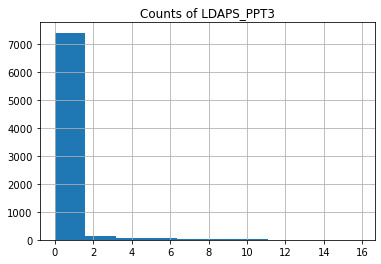

In [33]:
df["LDAPS_PPT3"].hist(grid=True)
plt.title("Counts of LDAPS_PPT3")
plt.show()

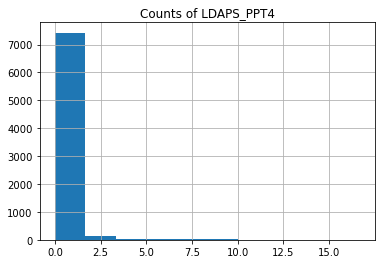

In [34]:
df["LDAPS_PPT4"].hist(grid=True)
plt.title("Counts of LDAPS_PPT4")
plt.show()

LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7. next-day 4th 6-hour split average precipitation of percent 0 to 2 seems to have high counts above 7000 records.

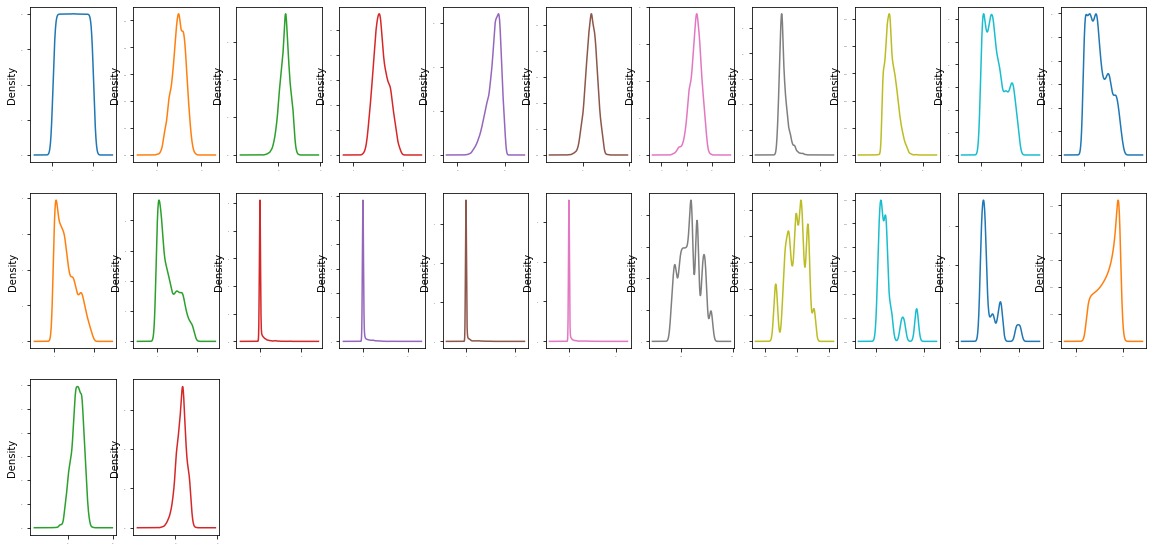

In [35]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

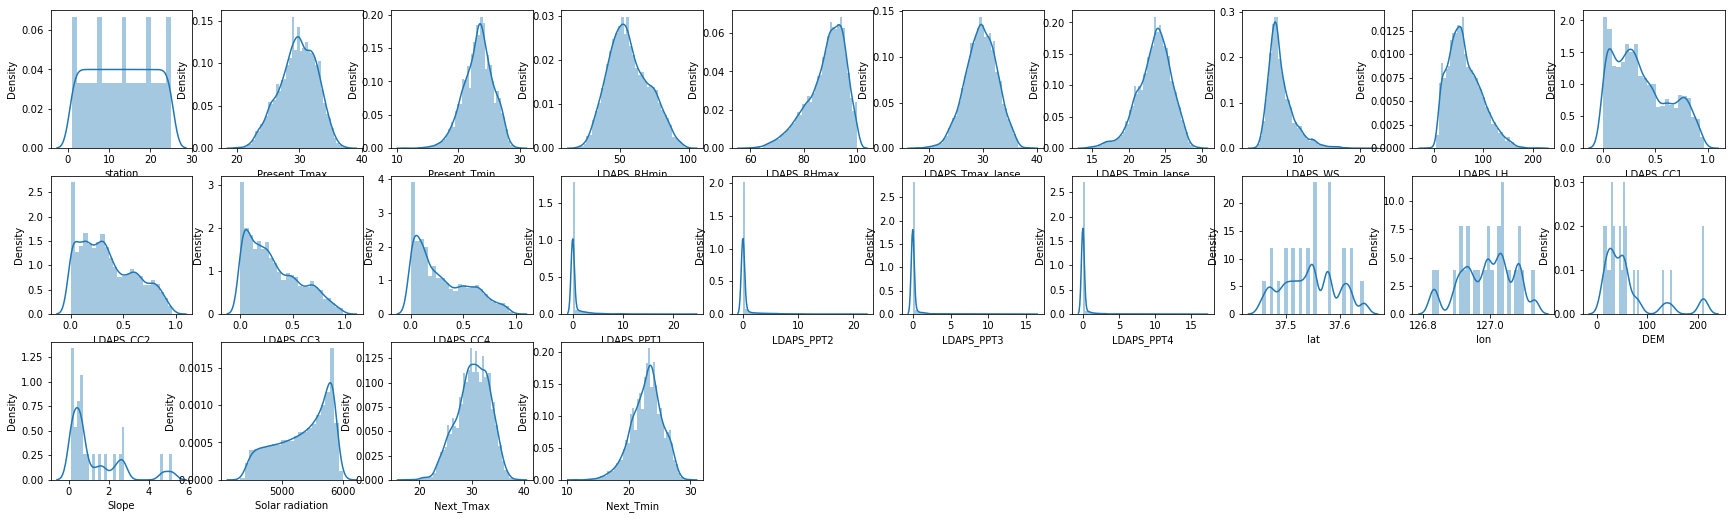

In [36]:
collist=df.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

Almost all the columns have skewness. some columns like LDAPSRHmax,SolarRadiation,Next_Tmin have left skewness. some columns like LDAPSCC1,LDAPSCC2,LDAPSCC3,LDAPSCC4 have righ skewness.

In [37]:
#Correlation 

df_corr=df.corr()
df_corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112582,0.131525,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,0.006917,...,-0.008247,-0.012458,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107900,0.128216
Present_Tmax,0.112582,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,...,-0.101362,-0.122051,-0.101118,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.131525,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,...,0.064851,-0.049017,-0.065550,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.066729,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,...,0.391110,0.240831,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.166953,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,...,0.228398,0.134087,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.069107,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,...,-0.242113,-0.188133,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.104753,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,...,0.000588,-0.088791,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,0.005275,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,...,0.192427,0.162173,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,-0.133339,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,...,-0.077061,0.016483,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155684,-0.056832
LDAPS_CC1,0.006917,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,...,0.389771,0.169130,0.092119,-0.008129,-0.006842,-0.014087,-0.020747,0.219264,-0.454771,-0.012732


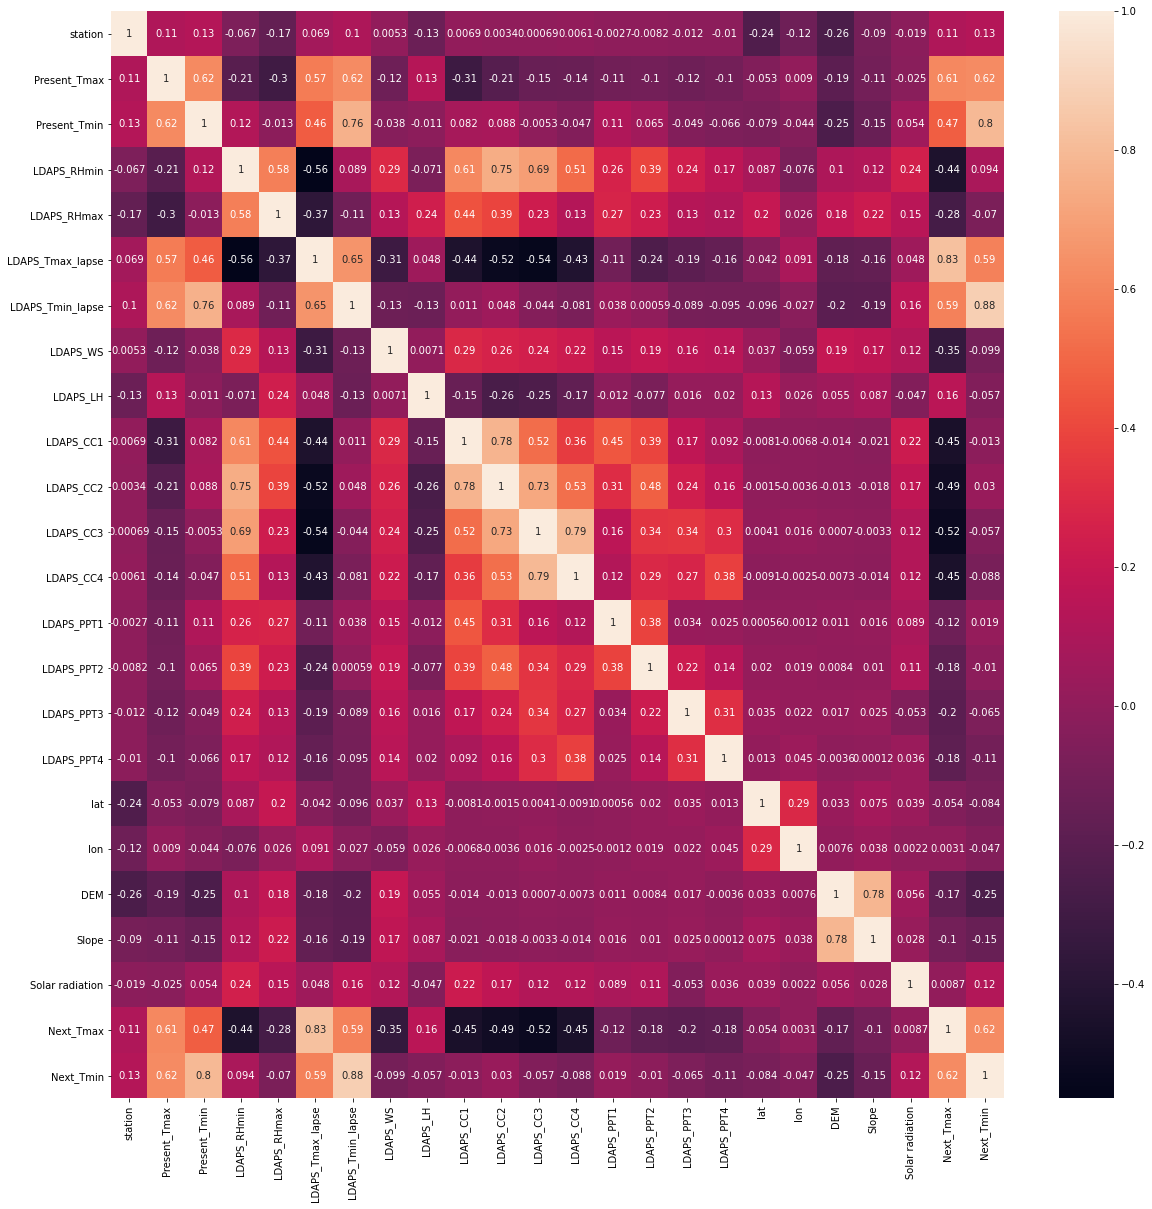

In [38]:
plt.figure(figsize=[20,20])
sns.heatmap(df_corr,annot=True)
plt.show()

Next_Tmax is more highly negatively corretated with many other columns when compased with Next_Tmin. We could notice that Next_Tmax is corretated with LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 and LDAPS_RHmin,LDAPS_ws. Also we can notice that other columns apart from target variables some other columns have intercorrelation betwen eachothers. #sns.pairplot(df,palette='bright')

## Outliers

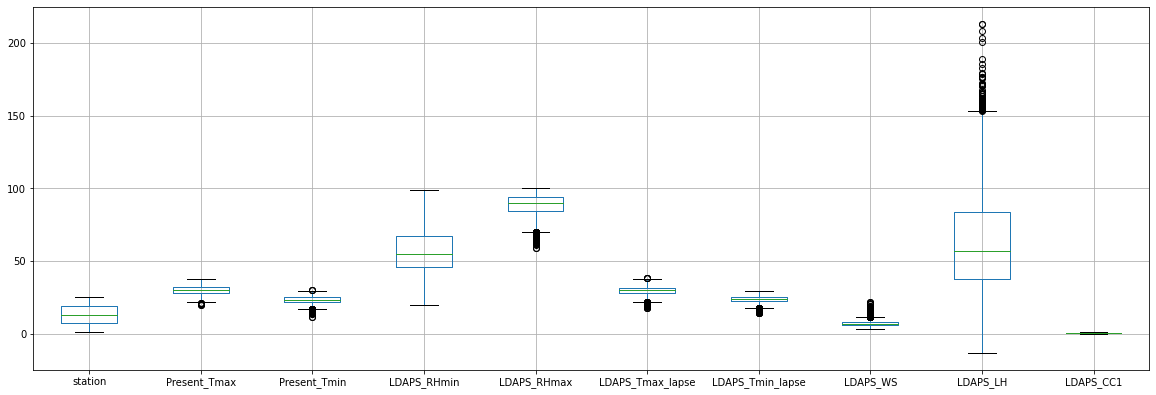

In [40]:
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

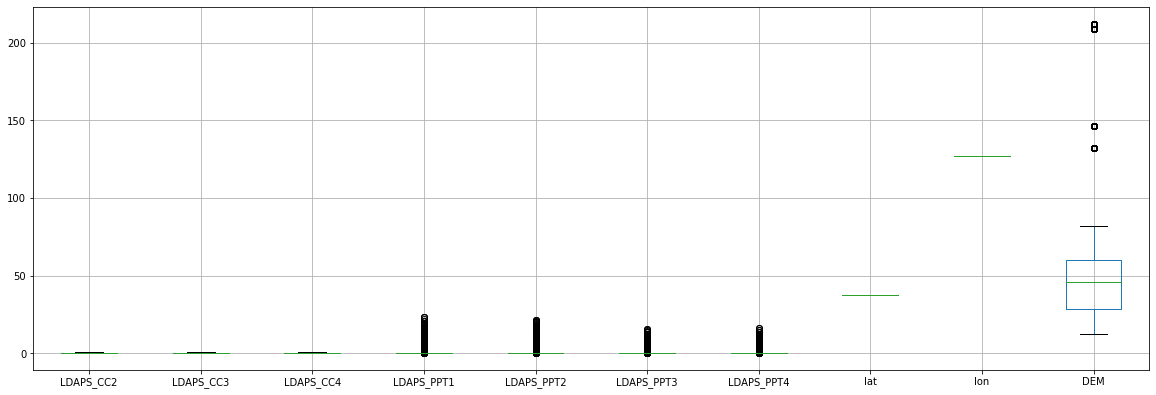

In [41]:
df.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

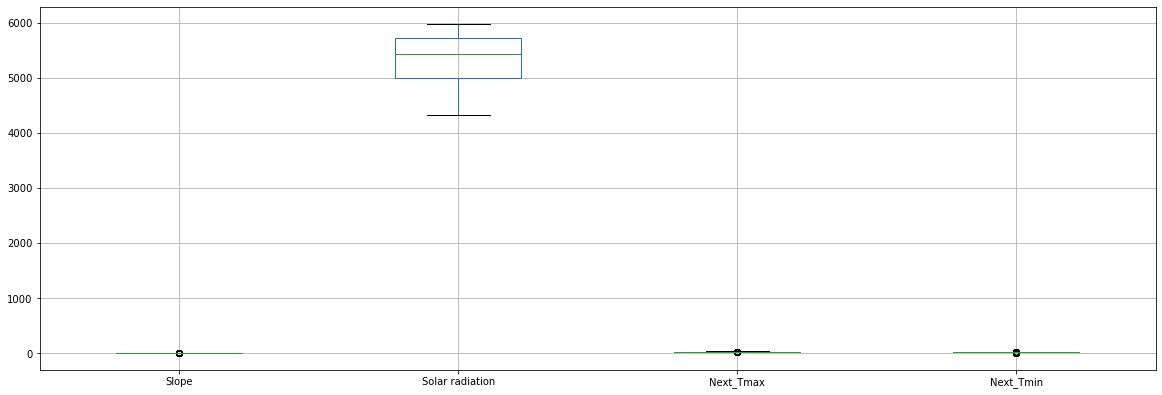

In [42]:
df.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [53]:
from scipy.stats import zscore
zscore = abs(zscore(df))
df_new = df.loc[(zscore<3).all(axis = 1)]
print(df.shape)
print("After removing outliers",df_new.shape)

(7752, 24)
After removing outliers (6894, 24)


In [54]:
df.shape

(7752, 24)

In [55]:
df_new.shape

(6894, 24)

### Feature selection: MultiOutput:

As we have 2 output variables "Next_Tmax","Next_Tmin" lets take both columns in Y variable as some models support for multiple output. So that we can predict for both columns.

## Splitting and scaling of the dataset

In [56]:
x=df_new.drop(columns=["Next_Tmax","Next_Tmin"])
y=df_new[["Next_Tmax","Next_Tmin"]]

In [57]:
y.shape , x.shape

((6894, 2), (6894, 22))

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=ss.transform(x)
x=pd.DataFrame(x)

## Skewness

In [59]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [60]:
df_skew=x

### Spliting the data into train amnd test dataset

In [61]:
#Checking the best random state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.7999012663712971   at random_state: 74


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5515, 22), (1379, 22), (5515, 2), (1379, 2))

## Model Building

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [65]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=40)
KNR=KNeighborsRegressor()

RFR=RandomForestRegressor(random_state=40)
GBR=GradientBoostingRegressor(random_state=40)

In [70]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("RandomForestRegressor",RFR))

In [71]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('------------------------------------->',name,'<-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=20,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

-------------------------------------> LinearRegression <-------------------------------
LinearRegression()
R2_score =  0.7999012663712971
Mean_Squared_Error = 1.4963667668385172
Mean_Absolute_Error = 0.9234657309311877
Root_Mean_Squared_Error = 1.2232607109028382
Cross_Val_Score =  0.6127809463061213


-------------------------------------> Lasso <-------------------------------
Lasso()
R2_score =  0.5591787814205962
Mean_Squared_Error = 3.2304232172355047
Mean_Absolute_Error = 1.4318031755470364
Root_Mean_Squared_Error = 1.7973378138890599
Cross_Val_Score =  0.261341440474648


-------------------------------------> Ridge <-------------------------------
Ridge()
R2_score =  0.7999041000011184
Mean_Squared_Error = 1.496334162862112
Mean_Absolute_Error = 0.9234598109966642
Root_Mean_Squared_Error = 1.2232473841632003
Cross_Val_Score =  0.6128028824744228


-------------------------------------> DecisionTreeRegressor <-------------------------------
DecisionTreeRegressor(random_state=40

In [72]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.799901,1.496367,0.923466,1.223261,0.612781
1,Lasso,0.559179,3.230423,1.431803,1.797338,0.261341
2,Ridge,0.799904,1.496334,0.923460,1.223247,0.612803
3,DecisionTreeRegressor,0.735898,1.954315,1.013343,1.397968,0.159384
4,RandomForestRegressor,0.890126,0.804524,0.667937,0.896953,0.580901


Random forest regressor is working best , so we'll go with RFR. 

## Hyperparameter tuning of Random forest regressor

In [77]:
from sklearn.model_selection import GridSearchCV
parameter ={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [78]:
gcv=GridSearchCV(RandomForestRegressor(), parameter,cv=5,scoring='r2') #Tuning

In [79]:
#gcv.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
gcv.best_params_

In [ ]:
RFR=RandomForestRegressor(bootstrap= True, criterion='mse',random_state=maxRS)
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred)*100)

## Saving the model

In [81]:
import joblib
joblib.dump(RFR,"temp_prediction.pkl")

['temp_prediction.pkl']

In [82]:
mod=joblib.load("temp_prediction.pkl")

In [84]:
prediction=mod.predict(x_test)

In [85]:
print(r2_score(y_test,prediction)*100)

89.0126036877404


In [86]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [87]:
prediction.to_csv('min_max_temp.csv') #Saving the predictions

In [88]:
prediction

,0,1
0,31.233,19.512
1,29.488,23.358
2,27.318,18.248
3,36.389,26.868
4,31.444,23.893
...,...,...
1374,31.632,21.957
1375,29.597,18.587
1376,29.345,22.667
1377,31.897,22.452
